In [0]:
#Importing the libraries
import numpy as np
import pandas as pd
import sklearn.preprocessing
import scipy as sp
import scipy.sparse as scp
import networkx as nx
from scipy.sparse import isspmatrix, dok_matrix, csc_matrix


In [0]:
# Importing the excel file
from google.colab import files
uploaded = files.upload()

Saving hw3.xlsx to hw3.xlsx


In [0]:
# Making a data frame from the xlsx file
data = pd.read_excel('hw3.xlsx') 
data

In [0]:
#Creating 0s data frame for adjacency matrix
adj = pd.DataFrame(np.zeros(shape=(17,17)), columns=data['n1'].unique(), index=data['n1'].unique())

In [0]:
#Feeding the 0s data frame with the edge values from the  xlsx
for x in range(42):
  # print(data.loc[x][2])
  row = data.loc[x][0]
  column = data.loc[x][1]
  adj.at[row, column] = data.loc[x][2]
  adj.at[column, row] = data.loc[x][2]
adj

,A,B,C,D,E,F,G,H,J,K,L,M,N,P,Q,R,S
A,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.0,1.0,0.0,1.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,2.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,4.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0
K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0


Adjacency Matrix with added self loop

In [0]:
pip install markov_clustering


In [0]:
import markov_clustering as mc

In [0]:
#Convert data frame to arrays
adjarrays = adj.values
adjarrays

In [0]:
adjmatrix = np.asmatrix(adjarrays)

In [0]:
#Mapping the numbers to vertices names A-0, B-1, C-2, D-3, E-4, F-5, G-6, H-7, J-8, K-9, L-10, M-11, N-12, P-13, Q-14, R-15, S-16

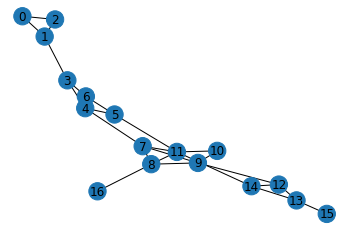

In [0]:
#Inflation with 1.1
mcla1 = mc.run_mcl(adjmatrix, inflation=1.1, iterations = 10)
result1 = mc.get_clusters(mcla1)
mc.draw_graph(adjmatrix, result1, with_labels=True, edge_color="black")

Clusters with 1.1 inflation value includes all nodes as 1 cluster

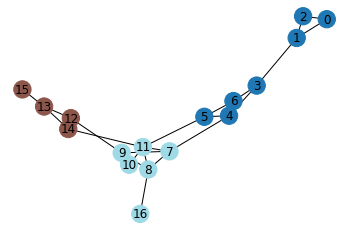

In [0]:
# Inflation with 1.3
mcla3 = mc.run_mcl(adjmatrix, inflation=1.3, iterations = 10)
result3 = mc.get_clusters(mcla3)
mc.draw_graph(adjmatrix, result3, with_labels=True, edge_color="black")

Clusters with inflation = 1.3 (12,13,14,15 ---- N,P,Q,R) 
(7,8,9,10,11,16 ----- H,J,K,L,M,S)
(0,1,2---A,B,C)
(3,4,5,6 ---D,E,F,G)

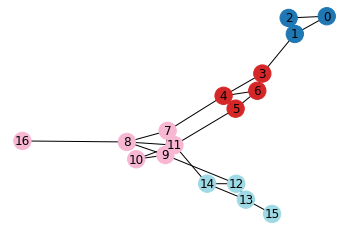

In [0]:
#Inflation 1.5 
mcla5 = mc.run_mcl(adjmatrix, inflation=1.5, iterations = 10)
result5 = mc.get_clusters(mcla5)
mc.draw_graph(adjmatrix, result5, with_labels=True, edge_color="black")

Clusters with inflation = 1.5 (12,13,14,15 ---- N,P,Q,R) (7,8,9,10,11,16 ----- H,J,K,L,M,S) (0,1,2---A,B,C) (3,4,5,6 ---D,E,F,G)

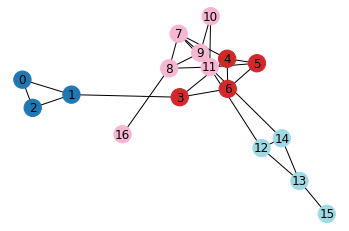

In [0]:
#Inflation 1.7 
mcla7 = mc.run_mcl(adjmatrix, inflation=1.7, iterations = 10)
result7 = mc.get_clusters(mcla7)
mc.draw_graph(adjmatrix, result7, with_labels=True, edge_color="black")

In [0]:
Clusters with inflation = 1.7 (12,13,14,15 ---- N,P,Q,R) (7,8,9,10,11,16 ----- H,J,K,L,M,S) (0,1,2---A,B,C) (3,4,5,6 ---D,E,F,G)

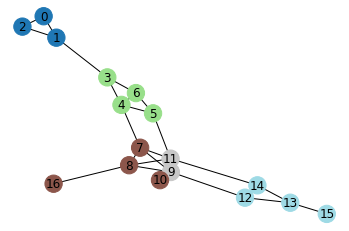

In [0]:
#Inflation 2.1 
mcla21 = mc.run_mcl(adjmatrix, inflation=2.1, iterations = 10)
result21 = mc.get_clusters(mcla21)
mc.draw_graph(adjmatrix, result21, with_labels=True, edge_color="black")

Clusters with inflation = 1.3 (12,13,14,15 ---- N,P,Q,R) (7,8,10,16 ----- H,J,L, S) (0,1,2---A,B,C) (3,4,5,6 ---D,E,F,G) (9,11---K,M)

In [0]:
#Adjacency Matrix for Inflation = 1.1
mcla1

array([[0.02168927, 0.02168926, 0.02168927, 0.02168913, 0.02168911,
        0.02168911, 0.02168912, 0.02168901, 0.021689  , 0.021689  ,
        0.021689  , 0.021689  , 0.02168895, 0.02168894, 0.02168895,
        0.02168894, 0.021689  ],
       [0.04522077, 0.04522075, 0.04522077, 0.04522049, 0.04522044,
        0.04522043, 0.04522046, 0.04522024, 0.04522023, 0.04522022,
        0.04522022, 0.04522023, 0.04522012, 0.0452201 , 0.04522012,
        0.0452201 , 0.04522022],
       [0.03436041, 0.0343604 , 0.03436041, 0.03436019, 0.03436016,
        0.03436015, 0.03436017, 0.03436   , 0.03435998, 0.03435998,
        0.03435998, 0.03435999, 0.0343599 , 0.03435989, 0.0343599 ,
        0.03435988, 0.03435998],
       [0.04352424, 0.04352423, 0.04352424, 0.04352413, 0.04352412,
        0.04352411, 0.04352412, 0.04352404, 0.04352403, 0.04352403,
        0.04352403, 0.04352404, 0.04352399, 0.04352399, 0.04352399,
        0.04352399, 0.04352403],
       [0.05721187, 0.05721186, 0.05721187, 0.057211

In [0]:
#Adjacency Matrix for Inflation = 1.1 mcla3
mcla3

array([[0.01130327, 0.01112869, 0.01128712, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.31878609, 0.31388017, 0.31833218, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.12345012, 0.12154348, 0.1232737 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.00217983, 0.00220778, 0.00218241, 0.003991

# New Section

In [0]:
#Adjacency Matrix for Inflation = 1.5 mcla5
mcla5

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.98465914, 0.98465914, 0.98465914, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.01534086, 0.01534086, 0.01534086, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.      

In [0]:
#Adjacency Matrix for Inflation = 1.1 mcla7
mcla7

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.      

In [0]:
#Adjacency Matrix for Inflation = 2.1 mcla21
mcla21

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

These algorithms are intuitive for me. As we increase the value of the inflation we get finer clusters. I think the algorithm did a great job interms of clustering graph points.Also adjacency matrix inflation 2.1 converges after 10 iteration.